In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', 100)
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import string
from wordcloud import WordCloud
import nltk
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to
[nltk_data]     /home/d.dasarathan/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/d.dasarathan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /home/d.dasarathan/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /home/d.dasarathan/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [2]:
df = pd.read_csv('fake reviews dataset.csv')

----------------------------------------------------------------------------------------------------

In [3]:
wn = WordNetLemmatizer()

In [4]:
# Pre-Processed News Dataset 1
# 1. set reviews to lowercase
# 2. remove urls
# 3. remove stopwords
# 4. remove punctuation
# 5. lemmatize words

from string import punctuation

def lemmatize_preprocessed_news(news_excerpt):
    '''
    Input:
        news_excerpt: a string containing a news excerpt.
    Output:
        news_excerpt_cleaned: a preprocessed and lemmatized news excerpt

    '''
    # Set news excerpt to lowercase
    lowercase_news_excerpt = news_excerpt.lower()
    
    # Remove links from lowercase news excerpt
    urls_removed_news_excerpt = re.sub(r"https?://\S+", "", lowercase_news_excerpt)
    
    # Remove stopwords
    stop_words = nltk.corpus.stopwords.words('english')
    words = urls_removed_news_excerpt.split()
    stopwords_removed = [word for word in words if word not in stop_words]

    # Change tokenized words back into a string for removal of punctuation
    text = ' '.join(word for word in stopwords_removed)
    
    # Remove punctuation from news excerpt
    punctuation_removed_news_excerpt = ''.join(char for char in text if char not in punctuation)

    # Tokenize words in news excerpt
    words = word_tokenize(punctuation_removed_news_excerpt)
    
    # Lemmatize words
    lemmatized_words = [wn.lemmatize(word) for word in words]
    
    # Convert list of words back to string
    cleaned_news_excerpt = ' '.join(word for word in lemmatized_words)
    
    return cleaned_news_excerpt

In [5]:
# Pre-Processed News Dataset 2
# 1. set reviews to lowercase
# 2. remove urls
# 3. remove stopwords
# 4. remove punctuation
# 5. stem words

def stemmed_preprocessed_news(news_excerpt):
    '''
    Input:
        news_excerpt: a string containing a news excerpt.
    Output:
        news_excerpt_cleaned: a preprocessed and lemmatized news excerpt

    '''
    # Set news excerpt to lowercase
    lowercase_news_excerpt = news_excerpt.lower()
    
    # Remove links from lowercase news excerpt
    urls_removed_news_excerpt = re.sub(r"https?://\S+", "", lowercase_news_excerpt)
    
    # Remove stopwords
    stop_words = nltk.corpus.stopwords.words('english')
    words = urls_removed_news_excerpt.split()
    stopwords_removed = [word for word in words if word not in stop_words]

    # Change tokenized words back into a string for removal of punctuation
    text = ' '.join(word for word in stopwords_removed)
    
    # Remove punctuation from news excerpt
    punctuation_removed_news_excerpt = ''.join(char for char in text if char not in punctuation)

    # Tokenize words in news excerpt
    words = word_tokenize(punctuation_removed_news_excerpt)
    
    # Stem words
    stemmer = PorterStemmer()
    stemmed_words = [stemmer.stem(word) for word in words]
    
    # Convert list of words back to string
    cleaned_news_excerpt = ' '.join(word for word in stemmed_words)
    
    return cleaned_news_excerpt

In [6]:
# Pre-Processed News Dataset 3
# 1. set reviews to lowercase
# 2. remove urls
# 3. remove stopwords
# 4. remove punctuation

def preprocess_news(news_excerpt):
    '''
    Input:
        news_excerpt: a string containing a news excerpt.
    Output:
        news_excerpt_cleaned: a preprocessed and lemmatized news excerpt

    '''
    # Set news excerpt to lowercase
    lowercase_news_excerpt = news_excerpt.lower()
    
    # Remove links from lowercase news excerpt
    urls_removed_news_excerpt = re.sub(r"https?://\S+", "", lowercase_news_excerpt)
    
    # Remove stopwords
    stop_words = nltk.corpus.stopwords.words('english')
    words = urls_removed_news_excerpt.split()
    stopwords_removed = [word for word in words if word not in stop_words]

    # Change tokenized words back into a string for removal of punctuation
    text = ' '.join(word for word in stopwords_removed)
    
    # Remove punctuation from news excerpt
    punctuation_removed_news_excerpt = ''.join(char for char in text if char not in punctuation)

    # Tokenize words in news excerpt
    words = word_tokenize(punctuation_removed_news_excerpt)
    
    # Convert list of words back to string
    cleaned_news_excerpt = ' '.join(word for word in words)
    
    return cleaned_news_excerpt

In [7]:
#df["lemmatized_text_"] = df["text_"].apply(lemmatize_preprocessed_news)
#df["stemmed_text_"] = df["text_"].apply(stemmed_preprocessed_news)
df["cleaned_text_"] = df["text_"].apply(preprocess_news)
#df["lemmatized_tokens"] = df["lemmatized_text_"].str.split(" ")
#df["stemmed_tokens"] = df["stemmed_text_"].str.split(" ")
df.head()

,category,rating,label,text_,cleaned_text_
0,Home_and_Kitchen_5,5.0,CG,"Love this! Well made, sturdy, and very comfor...",love this well made sturdy comfortable love it...
1,Home_and_Kitchen_5,5.0,CG,"love it, a great upgrade from the original. I...",love it great upgrade original ive mine couple...
2,Home_and_Kitchen_5,5.0,CG,This pillow saved my back. I love the look and...,pillow saved back love look feel pillow
3,Home_and_Kitchen_5,1.0,CG,"Missing information on how to use it, but it i...",missing information use it great product price
4,Home_and_Kitchen_5,5.0,CG,Very nice set. Good quality. We have had the s...,nice set good quality set two months


In [8]:
## Train Test split
#X = df.drop(['label'], axis=1).copy()
#X = df[['category','rating','lemmatized_text_','stemmed_text_']].copy()
X = df[['category','rating','text_']].copy()
y= df['label'].copy()

In [9]:
X.category = X.category.astype(str)
X.rating = X.rating.astype(str)

In [10]:
categories = X.category.unique().tolist()
ratings = X.rating.unique().tolist()

In [11]:
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.35)

In [12]:
print('x_train shape : ',x_train.shape)
print('x_test shape : ',x_test.shape)
print('y_train shape : ',y_train.shape)
print('y_test shape : ',y_test.shape)

x_train shape :  (26280, 3)
x_test shape :  (14152, 3)
y_train shape :  (26280,)
y_test shape :  (14152,)


In [13]:
y_train.value_counts()

CG    13184
OR    13096
Name: label, dtype: int64

In [14]:
y_test.value_counts()

OR    7120
CG    7032
Name: label, dtype: int64

In [15]:
y_train= preprocessing.label_binarize(y_train, classes =['CG','OR'])
y_test = preprocessing.label_binarize(y_test, classes =['CG','OR'])

In [16]:
ohe_transformer  = make_column_transformer(
    (OneHotEncoder(categories = [categories],handle_unknown='ignore',sparse=False),['category']),
    (OneHotEncoder(categories = [ratings],handle_unknown='ignore',sparse=False),['rating']),
    verbose=False,
    remainder='passthrough',
    n_jobs = -1)

In [17]:
ohe_x_train = ohe_transformer.fit_transform(x_train[['category','rating']])

ohe_category_cols = ohe_transformer.transformers_[0][1].get_feature_names_out( ['category']).tolist()
ohe_rating_cols = ohe_transformer.transformers_[1][1].get_feature_names_out( ['rating']).tolist()
ohe_cols = ohe_category_cols + ohe_rating_cols

x_train_ohe = pd.DataFrame(ohe_x_train, columns=ohe_cols)
x_train_ohe.head()

,category_Home_and_Kitchen_5,category_Sports_and_Outdoors_5,category_Electronics_5,category_Movies_and_TV_5,category_Tools_and_Home_Improvement_5,category_Pet_Supplies_5,category_Kindle_Store_5,category_Books_5,category_Toys_and_Games_5,category_Clothing_Shoes_and_Jewelry_5,rating_5.0,rating_1.0,rating_3.0,rating_2.0,rating_4.0
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [18]:
ohe_x_test = ohe_transformer.transform(x_test[['category','rating']])
x_test_ohe = pd.DataFrame(ohe_x_test, columns=ohe_cols)
x_test_ohe.head()

,category_Home_and_Kitchen_5,category_Sports_and_Outdoors_5,category_Electronics_5,category_Movies_and_TV_5,category_Tools_and_Home_Improvement_5,category_Pet_Supplies_5,category_Kindle_Store_5,category_Books_5,category_Toys_and_Games_5,category_Clothing_Shoes_and_Jewelry_5,rating_5.0,rating_1.0,rating_3.0,rating_2.0,rating_4.0
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [19]:
tfidf_vec1 = TfidfVectorizer(preprocessor= lemmatize_preprocessed_news)
tfidf_x_train_lemmatized_text = tfidf_vec1.fit_transform(x_train['text_'])
tfidf_x_train_lemmatized_text.shape

(26280, 36518)

In [20]:
x_train_tfifd_lemmatized_text = pd.DataFrame(tfidf_x_train_lemmatized_text.toarray(), columns = tfidf_vec1.get_feature_names())
x_train_tfifd_lemmatized_text.head()

,00,000,0005,0036in,007,009,01,010,01192015,013014,0182196,01oz,02,021114,0223,02262015,02v,0308,032012,032018,03292015,034536161x,03in,041715,045day,05,055xprob,06,06132016,061515,07,075,080,09,0b47046,0f,0z,10,100,1000,10000,10000v,10001,1000x,1001,100150,100200,100300,1005,10082015,...,zimmerman,zinc,zing,zinger,zinn,zip,ziploc,ziplock,ziplocks,zipp,zipped,zipper,zippered,zipping,zippo,ziptop,zipup,ziti,zoe,zoeller,zoey,zojirushi,zombicide,zombie,zombieland,zombiestrike,zon,zone,zoo,zoodles,zoologist,zoom,zoomies,zooming,zoophiles,zord,zorro,zpiiers,zridge,zs20,zt,zucchini,zuchinni,zulu,zuma,zumba,zumiez,zurg,zyliss,zymox
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [21]:
tfidf_x_test_lemmatized_text = tfidf_vec1.transform(x_test['text_'])
tfidf_x_test_lemmatized_text.shape

(14152, 36518)

In [22]:
x_test_tfifd_lemmatized_text = pd.DataFrame(tfidf_x_test_lemmatized_text.toarray(), columns = tfidf_vec1.get_feature_names())
x_test_tfifd_lemmatized_text.head()

,00,000,0005,0036in,007,009,01,010,01192015,013014,0182196,01oz,02,021114,0223,02262015,02v,0308,032012,032018,03292015,034536161x,03in,041715,045day,05,055xprob,06,06132016,061515,07,075,080,09,0b47046,0f,0z,10,100,1000,10000,10000v,10001,1000x,1001,100150,100200,100300,1005,10082015,...,zimmerman,zinc,zing,zinger,zinn,zip,ziploc,ziplock,ziplocks,zipp,zipped,zipper,zippered,zipping,zippo,ziptop,zipup,ziti,zoe,zoeller,zoey,zojirushi,zombicide,zombie,zombieland,zombiestrike,zon,zone,zoo,zoodles,zoologist,zoom,zoomies,zooming,zoophiles,zord,zorro,zpiiers,zridge,zs20,zt,zucchini,zuchinni,zulu,zuma,zumba,zumiez,zurg,zyliss,zymox
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [23]:
## Encoded x_train
#x_train_ohe + x_train_tfifd_lemmatized_text
x_train_lemmatized = pd.concat([x_train_ohe, x_train_tfifd_lemmatized_text], axis=1)

print('x_train_lemmatized shape : ',x_train_lemmatized.shape)

x_train_lemmatized shape :  (26280, 36533)


In [24]:
## Encoded x_test
#x_test_ohe + x_test_tfifd_lemmatized_text
x_test_lemmatized = pd.concat([x_test_ohe, x_test_tfifd_lemmatized_text], axis=1)
print('x_test_lemmatized shape : ',x_test_lemmatized.shape)

x_test_lemmatized shape :  (14152, 36533)


In [25]:
## Lemmatized full dataset
## Cross val score
X_full = pd.concat([x_train_lemmatized, x_test_lemmatized])
y_full = pd.concat([pd.DataFrame(y_train), pd.DataFrame(y_test)]) 
y_full.columns = ['Target']

In [26]:
print('X_full shape : ',X_full.shape)
print('y_full shape : ',y_full.shape)

X_full shape :  (40432, 36533)
y_full shape :  (40432, 1)


-----------------------------------------------------------------------

#### Modeling

In [27]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

In [28]:
def print_metrics(y_true,y_pred):
    cm = confusion_matrix(y_true,y_pred)
    print('Confusion matrix\n', cm)
    print('True Positives(TP) = ', cm[1,1])
    print('True Negatives(TN) = ', cm[0,0])
    print('False Positives(FP) = ', cm[0,1])
    print('False Negatives(FN) = ', cm[1,0])
    cm_matrix = pd.DataFrame(data=cm, columns=['Predict:CG', 'Predict:OR'], 
                             index=['Actual:CG', 'Actual:OR'])
    sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')
    print(classification_report(y_true, y_pred))
    TP = cm[1,1]
    TN = cm[0,0]
    FP = cm[0,1]
    FN = cm[1,0]
    
    classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)
    print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))
    ## classification error
    classification_error = (FP + FN) / float(TP + TN + FP + FN)
    print('Classification error : {0:0.4f}'.format(classification_error))
    ## precision score
    precision = TP / float(TP + FP)
    print('Precision : {0:0.4f}'.format(precision))
    ## recall 
    recall = TP / float(TP + FN)
    print('Recall or Sensitivity : {0:0.4f}'.format(recall))
    ## specificity
    specificity = TN / (TN + FP)
    print('Specificity : {0:0.4f}'.format(specificity))
    ## F-1 score
    f1 = 2 * (precision * recall) / (precision + recall)
    print('F-1 score : {0:0.4f}'.format(f1))

#### Hyper-parameter tuning

In [29]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold

##### RandomForest Classifier

In [30]:
rf_Model = RandomForestClassifier()

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 200, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [2,4,8,10]
# Minimum number of samples required to split a node
min_samples_split = [2, 5]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2]
# Method of selecting samples for training each tree
bootstrap = [True, False]

param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

print(param_grid)

{'n_estimators': [10, 31, 52, 73, 94, 115, 136, 157, 178, 200], 'max_features': ['auto', 'sqrt'], 'max_depth': [2, 4, 8, 10], 'min_samples_split': [2, 5], 'min_samples_leaf': [1, 2], 'bootstrap': [True, False]}


In [31]:
cv = RepeatedStratifiedKFold(n_splits=2, n_repeats=2, random_state=42)
cv

RepeatedStratifiedKFold(n_repeats=2, n_splits=2, random_state=42)

In [32]:
rf_rand_search = RandomizedSearchCV(estimator = rf_Model,
                                    param_distributions = param_grid,
                                    n_iter = 10,
                                    scoring = 'f1',
                                    n_jobs = 4,
                                    cv = cv,
                                    verbose = 1, 
                                    random_state = 1)

In [33]:
rf_rand_search.fit(x_train_lemmatized, y_train.ravel())

Fitting 4 folds for each of 10 candidates, totalling 40 fits


RandomizedSearchCV(cv=RepeatedStratifiedKFold(n_repeats=2, n_splits=2, random_state=42),
                   estimator=RandomForestClassifier(), n_jobs=4,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [2, 4, 8, 10],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2],
                                        'min_samples_split': [2, 5],
                                        'n_estimators': [10, 31, 52, 73, 94,
                                                         115, 136, 157, 178,
                                                         200]},
                   random_state=1, scoring='f1', verbose=1)

In [34]:
rf_rand_search.best_estimator_

RandomForestClassifier(max_depth=10, max_features='sqrt', n_estimators=200)

In [35]:
best_model = rf_rand_search.best_estimator_ 

In [36]:
best_model.fit(x_train_lemmatized, y_train.ravel())

RandomForestClassifier(max_depth=10, max_features='sqrt', n_estimators=200)

Confusion matrix
 [[11902  1282]
 [ 3670  9426]]
True Positives(TP) =  9426
True Negatives(TN) =  11902
False Positives(FP) =  1282
False Negatives(FN) =  3670
              precision    recall  f1-score   support

           0       0.76      0.90      0.83     13184
           1       0.88      0.72      0.79     13096

    accuracy                           0.81     26280
   macro avg       0.82      0.81      0.81     26280
weighted avg       0.82      0.81      0.81     26280

Classification accuracy : 0.8116
Classification error : 0.1884
Precision : 0.8803
Recall or Sensitivity : 0.7198
Specificity : 0.9028
F-1 score : 0.7920


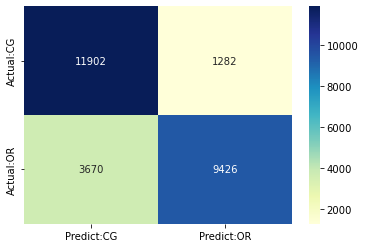

In [37]:
y_train_predict = best_model.predict(x_train_lemmatized)
print_metrics(y_train, y_train_predict)   

Confusion matrix
 [[6217  815]
 [2217 4903]]
True Positives(TP) =  4903
True Negatives(TN) =  6217
False Positives(FP) =  815
False Negatives(FN) =  2217
              precision    recall  f1-score   support

           0       0.74      0.88      0.80      7032
           1       0.86      0.69      0.76      7120

    accuracy                           0.79     14152
   macro avg       0.80      0.79      0.78     14152
weighted avg       0.80      0.79      0.78     14152

Classification accuracy : 0.7858
Classification error : 0.2142
Precision : 0.8575
Recall or Sensitivity : 0.6886
Specificity : 0.8841
F-1 score : 0.7638


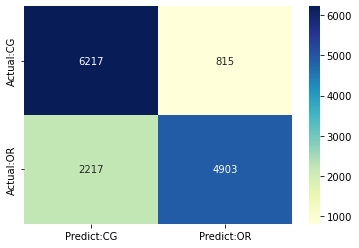

In [38]:
y_test_predict = best_model.predict(x_test_lemmatized)
print_metrics(y_test, y_test_predict)

In [39]:
## Cross val score on X_full and y_full
cross_val_score = cross_val_score(best_model, 
                                  X = X_full, 
                                  y = y_full.values.ravel(), 
                                  cv = 5,
                                  scoring = 'f1',
                                  n_jobs = 10)

print('cross_val_score : ',cross_val_score)

cross_val_score :  [0.77494384 0.77126255 0.7835105  0.77847604 0.77229027]


In [40]:
from statistics import mean
cv_score = mean(cross_val_score)
print('mean cross_val_score : ',cv_score)

mean cross_val_score :  0.7760966379770144
